<a href="https://colab.research.google.com/github/malakkazi/Cognifyz_InternshipTasks/blob/main/L3_T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [3]:
df = pd.read_csv("dataset.csv")

In [4]:
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong C

In [5]:
print("\nColumn names in dataset:")
print(df.columns)


Column names in dataset:
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [6]:
price_col   = "Price range"
delivery_col = "Has Online delivery"
booking_col  = "Has Table booking"

In [7]:
df[price_col]   = pd.to_numeric(df[price_col], errors="coerce")
df[delivery_col] = df[delivery_col].astype(str).str.strip().str.lower()
df[booking_col]  = df[booking_col].astype(str).str.strip().str.lower()

In [8]:
df[delivery_col] = df[delivery_col].map({"yes":1, "no":0})
df[booking_col]  = df[booking_col].map({"yes":1, "no":0})

In [9]:
df = df.dropna(subset=[price_col, delivery_col, booking_col])

In [10]:
service_summary = df.groupby(price_col)[[delivery_col, booking_col]].mean() * 100
print("\nPercentage of restaurants offering services by price range:")
print(service_summary)


Percentage of restaurants offering services by price range:
             Has Online delivery  Has Table booking
Price range                                        
1                      15.774077           0.022502
2                      41.310633           7.677482
3                      29.190341          45.738636
4                       9.044369          46.757679


/tmp/ipython-input-3694516897.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=price_col, y=delivery_col, estimator=np.mean, ci=None, palette="Blues")
/tmp/ipython-input-3694516897.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=price_col, y=delivery_col, estimator=np.mean, ci=None, palette="Blues")


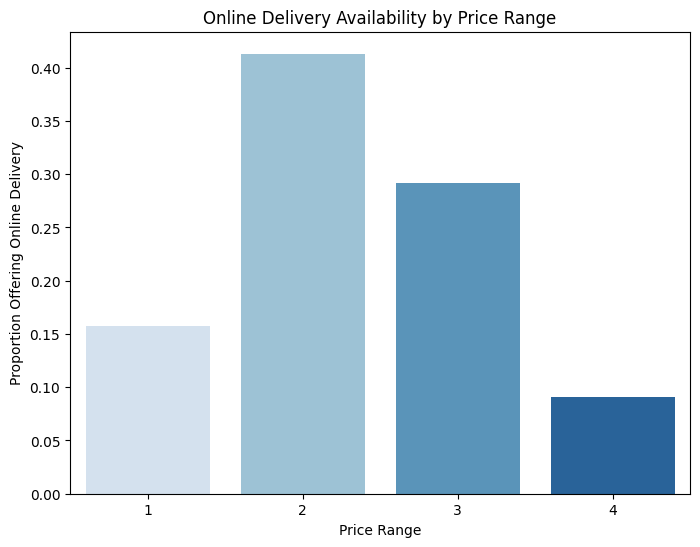

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x=price_col, y=delivery_col, estimator=np.mean, ci=None, palette="Blues")
plt.title("Online Delivery Availability by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Proportion Offering Online Delivery")
plt.show()

/tmp/ipython-input-636215720.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=price_col, y=booking_col, estimator=np.mean, ci=None, palette="Greens")
/tmp/ipython-input-636215720.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=price_col, y=booking_col, estimator=np.mean, ci=None, palette="Greens")


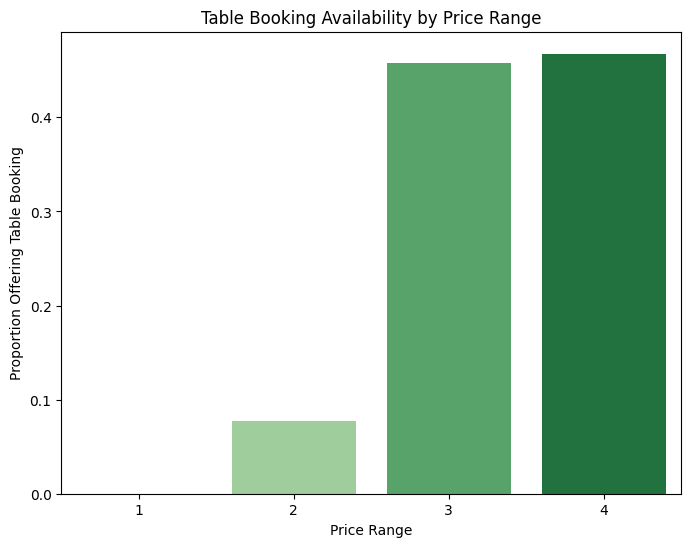

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x=price_col, y=booking_col, estimator=np.mean, ci=None, palette="Greens")
plt.title("Table Booking Availability by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Proportion Offering Table Booking")
plt.show()

In [13]:
corr_delivery = df[price_col].corr(df[delivery_col])
corr_booking  = df[price_col].corr(df[booking_col])

print(f"\nCorrelation between Price Range & Online Delivery: {corr_delivery:.3f}")
print(f"Correlation between Price Range & Table Booking: {corr_booking:.3f}")


Correlation between Price Range & Online Delivery: 0.078
Correlation between Price Range & Table Booking: 0.502
